In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation
from scipy.spatial import Delaunay, ConvexHull, QhullError
from scipy.spatial.distance import pdist, squareform
from scipy.interpolate import interp1d, splprep, splev
from shapely.geometry import Polygon, Point, LineString
from shapely.ops import unary_union
from matplotlib.path import Path

In [93]:
# Example data
inner_cone = np.array([
    [6.49447171658257, 41.7389113024907],
    [8.49189149682204, 41.8037451937836],
    [10.4848751821667, 41.8690573815958],
    [12.4735170408320, 41.9319164105607],
    [14.4579005366844, 41.9894100214277],
    [16.4380855350346, 42.0386448286094],
    [22.3534294484539, 42.1081444836209],
    [24.3165071700586, 42.0957886616701],
    [26.2748937812757, 42.0609961552005],
    [28.2282468521326, 42.0009961057027],
    [30.1761149294924, 41.9130441723441],
    [32.0795946202318, 41.7896079706255],
    [33.8817199327800, 41.5914171121172],
    [37.1238045770298, 40.8042280456036],
    [38.5108000329817, 40.1631834270328],
    [40.7498148915033, 38.2980872410971],
    [41.6428012725483, 37.0572740958520],
    [42.3684952713925, 35.6541128117207],
    [42.9237412798850, 34.1220862330776],
    [43.4562377484922, 30.9418382209873],
    [43.4041825643156, 29.3682424552239],
    [43.1310900802234, 27.8454335309325],
    [42.6373380962399, 26.4081334491868],
    [41.9213606895600, 25.0723633391567],
    [39.8493389129556, 22.6733478226331],
    [37.1330772214184, 20.7325660900255],
    [35.6438750732877, 19.9947555768891],
    [34.0970198095490, 19.4366654165469],
    [32.5117013027651, 19.0709696852617],
    [30.9105163807122, 18.9081142458350],
    [29.3050197645280, 18.9545691109581],
    [27.6851829730976, 19.2045278218877],
    [24.4759113345748, 20.2570787967781],
    [21.3685688158133, 21.9377743574784],
    [19.8072187451783, 22.9775182612717],
    [18.2040616100214, 24.1054677217171],
    [16.5291821840059, 25.2778069272720],
    [14.7490275765791, 26.4446189166734],
    [10.7566166245341, 28.5122919557571],
    [8.59035703212379, 29.2671114310357],
    [6.36970146209175, 29.8034933598624],
    [4.11753580708921, 30.1252372241127],
    [-0.405973075502234, 30.1500578730274],
    [-2.75740378439869, 29.8083496207198],
    [-7.53032772904185, 27.7630095130657],
    [-9.55882345130782, 25.8360602858122],
    [-10.9967405848897, 23.4446538263345],
    [-11.7530941810305, 20.7728147412547],
    [-11.7945553145768, 18.0098876247875],
    [-11.1377067999357, 15.3398589997259],
    [-9.84329815385971, 12.9293912425976],
    [-4.31864858110937, 8.32717777382664],
    [-2.64821833398598, 7.33684919790624],
    [-1.23396167898668, 6.38669110355496],
    [-0.139159724307982, 5.41310565569044],
    [0.583196113153409, 4.42232005043196],
    [1.00846697640521, 3.25999992647677],
    [1.42452204766312, -0.235409796458984],
    [1.70769766109080, -2.50157264279400],
    [2.43395748729283, -5.02746251429141],
    [5.90118769712182, -9.36241405660719],
    [8.13219227914984, -10.6723062142501],
    [10.4108490166236, -11.5249176387577],
    [14.7174578544944, -12.4162331505645],
    [16.6611999625517, -12.7135418322201],
    [18.4669199253036, -13.0527675263258],
    [20.2513584750154, -13.4902268953088],
    [22.0275043214267, -14.0208096878619],
    [23.7938485314227, -14.6351269687361],
    [29.0380553533840, -16.8864873288738],
    [30.7681622622371, -17.7392626196140],
    [32.3760783979903, -18.6039808584518],
    [33.7897740653103, -19.5166383512928],
    [34.9667330396653, -20.5090458088496],
    [35.8614855279756, -21.5808775016001],
    [36.4612858521334, -22.7451308643890],
    [36.8711477182864, -25.4557910211687],
    [36.6696611457761, -26.8930663715963],
    [35.5175477601575, -29.6867414698392],
    [34.6369025552692, -30.9011171932826],
    [33.5888282300982, -31.9233335254203],
    [32.4026659456202, -32.7184009884738],
    [29.6211021726631, -33.5886007841515],
    [27.9849204584717, -33.7170193136260],
    [26.2183096377485, -33.6848022646400],
    [24.3309596262912, -33.5465676173721],
    [22.3208062313579, -33.3726612899257],
    [18.1328018280879, -33.1964401661521],
    [14.1429922166079, -33.1731958647648],
    [12.2313503871593, -33.1266878316603],
    [10.3778348140314, -33.0132052855498],
    [8.58829435522285, -32.8040580663346],
    [6.84064584789227, -32.4725374962639],
    [5.07009944482550, -32.0172508962124],
    [3.27322533222869, -31.4640545504384],
    [-0.418687595522242, -30.1796696447230],
    [-4.09627739578414, -28.8238238024923],
    [-5.89202160786470, -28.1122858460715],
    [-7.65255868890126, -27.3645667343373],
    [-9.37355826729420, -26.5706223212060],
    [-11.0772549160090, -25.7164049091686],
    [-14.4775165017317, -23.8562440887552],
    [-16.1852335110450, -22.8738429891042],
    [-17.9066984601430, -21.8724503885825],
    [-19.6280899733090, -20.8717543910881],
    [-22.9283852622260, -18.8697018891971],
    [-24.4790807692059, -17.8277052050408],
    [-27.3051265922114, -15.5801090683244],
    [-28.5448479313762, -14.3530174024786],
    [-29.6530218737847, -13.0404842531107],
    [-30.6444406510768, -11.6234683085559],
    [-31.5169602294234, -10.1146356600596],
    [-32.2692264908853, -8.52739205631154],
    [-32.9016624434539, -6.87420998418598],
    [-34.1160057737752, -1.60803776182190],
    [-34.3261608207142, 0.237322459171913],
    [-34.4624174228984, 2.11880932640591],
    [-34.5407037273032, 4.03273612643633],
    [-34.5779532171168, 5.97700580252438],
    [-34.5920061096721, 7.95066706685753],
    [-34.6203010935088, 11.9628384547546],
    [-34.6463516562825, 13.9656473217268],
    [-34.6751545298116, 15.9616504117489],
    [-34.7230350194217, 19.9334733431980],
    [-34.7332354577762, 21.9093507078716],
    [-34.7284338451120, 23.8784778261844],
    [-34.6466389854161, 27.7320065787716],
    [-34.4887912178893, 29.4532110956616],
    [-34.1674004338218, 30.9833511541837],
    [-33.6523388115164, 32.2835000565933],
    [-32.9540435069214, 33.3001054449054],
    [-32.0153881487289, 34.0792118997941],
    [-28.7867224485036, 35.7027232116937],
    [-26.8737074947600, 36.7067299514829],
    [-21.7623826032159, 39.5958663210330],
    [-20.1418625665089, 40.3549987041733],
    [-18.5286281071084, 40.9596629960629],
    [-16.9269162480936, 41.3805845888608],
    [-15.2947586791386, 41.6060043323431],
    [-13.5312107482484, 41.6777684016896],
    [-9.64289482747188, 41.5853268011948],
    [-7.61112976471737, 41.5421552074769],
    [-5.58318659783131, 41.5226049040385],
    [-1.53976115651896, 41.5427010208205],
    [0.475431094342800, 41.5765527022834],
    [2.48619653317858, 41.6224387797260],
    [6.49447171658257, 41.7389113024907],
    [8.49189149682204, 41.8037451937836],
    [10.4848751821667, 41.8690573815958],
    [12.4735170408320, 41.9319164105607],
    [14.4579005366844, 41.9894100214277]
])
outer_cone= np.array([
    [8.29483356036796, 47.8005083348189],
    [10.2903642978411, 47.8659036790991],
    [12.2903853701921, 47.9291209919643],
    [14.2949817462715, 47.9871977358879],
    [16.3042155724446, 48.0371512121282],
    [18.3181128601480, 48.0759783968909],
    [24.3872198920862, 48.0953719564451],
    [26.4188343006777, 48.0592693339474],
    [28.4542241392916, 47.9967391176812],
    [30.4929111587893, 47.9046750145358],
    [32.5715480310539, 47.7694057800486],
    [34.7354354110013, 47.5303707137414],
    [36.9671887094624, 47.1090924863221],
    [41.4608084515852, 45.3878796220444],
    [43.5486168233166, 43.9466679046951],
    [46.7637769841785, 40.1838709296144],
    [47.8711744070693, 38.0458741563760],
    [48.6759026786991, 35.8287318442088],
    [49.2095764033813, 33.5308461962448],
    [49.3717906596030, 28.7456240961468],
    [48.9402528124274, 26.3442245678724],
    [48.1379348685719, 24.0115869446911],
    [46.9718766730536, 21.8331831495909],
    [45.5183908761479, 19.8937545099424],
    [42.0344522843090, 16.7521854290723],
    [38.0024261140352, 14.4777602906678],
    [35.7974585974047, 13.6826661179064],
    [33.4965697064231, 13.1523520909686],
    [31.1302557069132, 12.9121393769316],
    [28.7495405480103, 12.9803375419597],
    [26.4275819814214, 13.3378047377686],
    [24.1935407090117, 13.9452300781406],
    [20.0475993937396, 15.7534500265274],
    [16.3951857815830, 18.0421326577611],
    [14.7344934919394, 19.2103582158950],
    [13.1401972893467, 20.3265665388672],
    [11.5833537070008, 21.3477072094266],
    [10.0428032559345, 22.2341839570762],
    [6.90006888859156, 23.5101221144020],
    [5.24310276950825, 23.9102111346615],
    [3.54614319085073, 24.1525066527486],
    [1.82453456285617, 24.2384953941222],
    [-1.49646987010121, 23.9423419780574],
    [-2.88611819700968, 23.5188503619890],
    [-4.87663538345929, 22.0841121388762],
    [-5.48860547878733, 21.0654842962416],
    [-5.81567263287249, 19.9085084532591],
    [-5.83349192339180, 18.6923268134878],
    [-5.53917605118359, 17.4977407053060],
    [-4.95012865665813, 16.4016948398736],
    [-4.05317915721677, 15.4107620877673],
    [0.492121533127250, 12.4494087837712],
    [2.38653784056378, 11.1712478467585],
    [4.26363974073903, 9.48929957533922],
    [5.87263326747036, 7.25460792254726],
    [6.83628597561633, 4.68706884998182],
    [7.22868549746256, 2.31823546262226],
    [7.60968340642873, -1.42149659832866],
    [7.97509056184070, -2.72619237583490],
    [8.54802041473498, -3.68009075055991],
    [10.6601317831479, -5.23084300440234],
    [12.1167992046948, -5.77254995615783],
    [13.7805173778787, -6.17261534649334],
    [17.6231089179688, -6.79114948102549],
    [19.7388585053217, -7.18913620702706],
    [21.8298950982966, -7.70159820373082],
    [23.8771264994103, -8.31301696223576],
    [25.8797524901441, -9.00938215804746],
    [27.8385154732156, -9.77726113305095],
    [33.4828656272925, -12.3885256946890],
    [35.3884273243004, -13.4149776838374],
    [37.3243202944926, -14.6682383106842],
    [39.1922962154652, -16.2493960759111],
    [40.8455371260767, -18.2403341823979],
    [42.0705518955054, -20.6153105774461],
    [42.7346589897432, -23.1596769590206],
    [42.5147079384368, -28.2478460553850],
    [41.7538036771420, -30.6144579632713],
    [39.1831183440142, -34.8167170198948],
    [37.3770559671547, -36.5762176430613],
    [35.2523671945937, -37.9984770098583],
    [32.8791324240351, -38.9934826446380],
    [28.1270516052592, -39.7153356388220],
    [25.9046030197368, -39.6765956654354],
    [23.8121031317075, -39.5240911796868],
    [21.8464792201864, -39.3538830619781],
    [19.9742827992146, -39.2418187116909],
    [16.0937484438592, -39.1847191943436],
    [11.9928246424488, -39.1219447460144],
    [9.86352410414552, -38.9911216862446],
    [7.69014987529461, -38.7364552625087],
    [5.51782683234722, -38.3249002543397],
    [3.42382206323132, -37.7869797271760],
    [1.40682879137184, -37.1663842455962],
    [-0.541821138011257, -36.5027177844325],
    [-4.34015621146816, -35.1410426555394],
    [-8.16436000121084, -33.6653461038145],
    [-10.0767778404464, -32.8530238495275],
    [-11.9792230934156, -31.9752972248347],
    [-13.8428086034457, -31.0410375539532],
    [-15.6623928384561, -30.0682796038662],
    [-19.1958077261686, -28.0638760232219],
    [-20.9238240938196, -27.0586776214187],
    [-22.6524765196268, -26.0537507263292],
    [-24.4077080359509, -25.0144494209715],
    [-27.9360780875981, -22.7317004681533],
    [-29.6698538901663, -21.4381474644069],
    [-32.9453564203185, -18.4316844689044],
    [-34.4107565227371, -16.6961594315364],
    [-35.7065080013589, -14.8445665903860],
    [-36.8313109009813, -12.8998963192641],
    [-37.7878917266941, -10.8820330087871],
    [-38.5811746376266, -8.80892992160400],
    [-39.2178699842561, -6.69652639898087],
    [-40.3011807339499, -0.309611756649864],
    [-40.4533406202231, 1.78890139416343],
    [-40.5382789183978, 3.86217286202336],
    [-40.5775538214583, 5.90777727960811],
    [-40.5919497511314, 7.92466131148779],
    [-40.6014196538181, 9.91275631233656],
    [-40.6457557289961, 13.8810850824754],
    [-40.6745334498720, 15.8753221224371],
    [-40.7017394704418, 17.8763494567535],
    [-40.7332264185658, 21.8989357934230],
    [-40.7282871101318, 23.9204396925825],
    [-40.7033369152928, 25.9485603009070],
    [-40.4291604069450, 30.2970202551981],
    [-39.9260632680985, 32.6679289532538],
    [-38.9665731582284, 35.0689826553948],
    [-37.4022554152914, 37.3266934320522],
    [-35.2924298638551, 39.1052438930590],
    [-33.2056190082383, 40.2549711124138],
    [-29.7935826692359, 41.9483259837501],
    [-28.1179159337869, 42.9113732230407],
    [-22.4882559681602, 45.8771756304123],
    [-20.3655683666973, 46.6715497668858],
    [-18.1093389106216, 47.2629205744315],
    [-15.7909195473899, 47.5854545071348],
    [-13.5681633690504, 47.6776546092619],
    [-11.4644254110510, 47.6457593795914],
    [-7.51988574761303, 47.5414613781388],
    [-5.55737846449435, 47.5225493988029],
    [-3.59058902924480, 47.5236739806379],
    [0.355197826404633, 47.5753479114301],
    [2.33404449770947, 47.6205092826547],
    [4.31684977705784, 47.6749328204622],
    [8.29483356036796, 47.8005083348189],
    [10.2903642978411, 47.8659036790991],
    [12.2903853701921, 47.9291209919643],
    [14.2949817462715, 47.9871977358879],
    [16.3042155724446, 48.0371512121282]
])

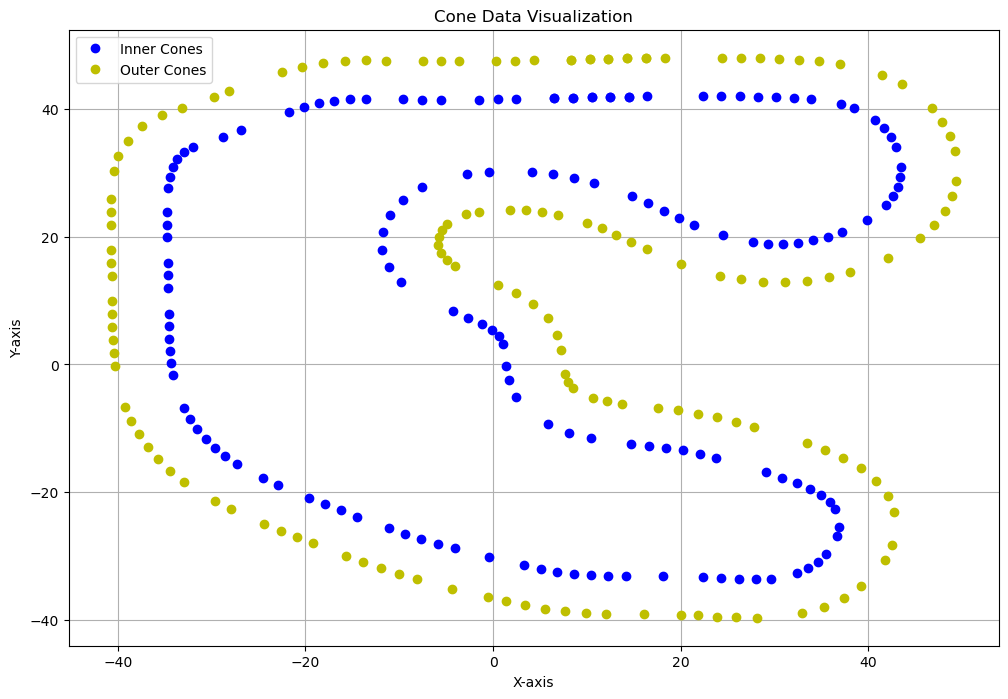

In [94]:
# Example: Plotting the data
plt.figure(figsize=(12, 8))
plt.plot(inner_cone[:, 0], inner_cone[:, 1], 'bo', label='Inner Cones')  # Blue for inner cones
plt.plot(outer_cone[:, 0], outer_cone[:, 1], 'yo', label='Outer Cones')  # Yellow for outer cones
plt.legend()
plt.title('Cone Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [95]:
# Ensure both arrays have the same number of points
assert inner_cone.shape[0] == outer_cone.shape[0], "Inner and outer cone arrays must have the same number of points."

# Preprocess the data by merging inner and outer coordinates alternately
m, nc = inner_cone.shape
P = np.zeros((2 * m, nc))
# Alternate merging of inner and outer cone positions
P[0::2, :] = inner_cone
P[1::2, :] = outer_cone

# Initialize empty lists to store the planned coordinates
xp = []  # Planned x coordinates
yp = []  # Planned y coordinates

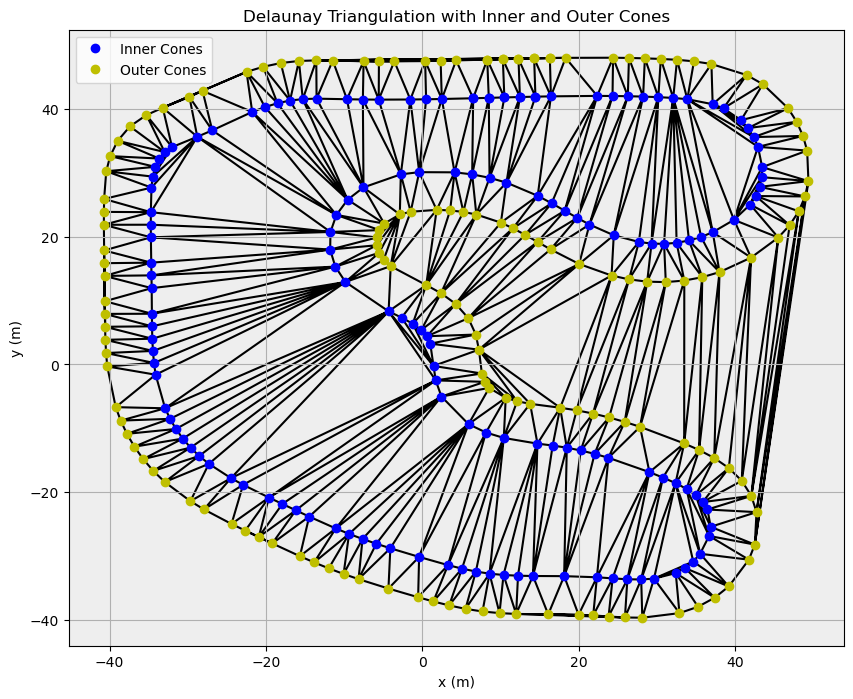

In [96]:
# Initialize interval and plotting
interv = 300
xp = []  # Planned x coordinates
yp = []  # Planned y coordinates

plt.figure(figsize=(10, 8))

# Iterate over intervals to perform Delaunay triangulation
for i in range(interv, 2 * m + 1, interv):
    # Create Delaunay triangulation for the current interval of points
    DT = Delaunay(P[abs(i - interv):i, :])
    
    # Coordinates of the vertices
    Pl = DT.points
    
    # Triangulation connectivity matrix
    Cl = DT.simplices
    
    # Size of vertices matrix
    mc, nc = Pl.shape
    
    # Plot Delaunay triangulations
    plt.triplot(Pl[:, 0], Pl[:, 1], Cl, 'k-')  # Plot the Delaunay triangles

plt.plot(inner_cone[:, 0], inner_cone[:, 1], 'bo', label='Inner Cones')  # Blue for inner cones
plt.plot(outer_cone[:, 0], outer_cone[:, 1], 'yo', label='Outer Cones')  # Yellow for outer cones
plt.grid(True)
plt.gca().set_facecolor('#EEEEEE')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Delaunay Triangulation with Inner and Outer Cones')
plt.legend()
plt.show()

In [97]:
def generate_constraints(mc, interv):
    if interv % 2 == 0:
        # Define inner constraints for even intervals
        cIn = np.vstack((
            [2, 1],
            np.column_stack((np.arange(1, mc-2, 2), np.arange(3, mc, 2))),
            [mc-1, mc-2]  # Changed from [mc-1, mc]
        ))
        
        # Define outer constraints for even intervals
        start = np.arange(2, mc-1, 2)
        end = np.arange(4, mc-1, 2)
        # Ensure both arrays have the same length
        min_length = min(len(start), len(end))
        cOut = np.column_stack((start[:min_length], end[:min_length]))
    else:
        # Define inner constraints for odd intervals
        cIn = np.vstack((
            [2, 1],
            np.column_stack((np.arange(1, mc-2, 2), np.arange(3, mc, 2))),
            [mc-1, mc-2]  # Changed from [mc-1, mc]
        ))
        
        # Define outer constraints for odd intervals
        start = np.arange(2, mc-3, 2)
        end = np.arange(4, mc-1, 2)
        # Ensure both arrays have the same length
        min_length = min(len(start), len(end))
        cOut = np.column_stack((start[:min_length], end[:min_length]))
    
    return np.vstack((cIn, cOut))

# Check if the interval and number of points are valid
if interv <= 0 or mc < 2:
    raise ValueError("Interval must be positive and number of points must be at least 2")

# Generate constraints
C = generate_constraints(mc, interv)

# Check for validity of constraints
def check_constraints(constraints, max_index):
    """Check if all constraints are within the valid index range."""
    valid = True
    for edge in constraints:
        if np.any(edge >= max_index) or np.any(edge < 0):  # Changed to >= and 0
            print(f"Invalid edge {edge} in constraints.")
            valid = False
    return valid

# Check if constraints are valid
if not check_constraints(C, mc):
    print("Some constraints are invalid.")
else:
    print("All constraints are valid.")

All constraints are valid.


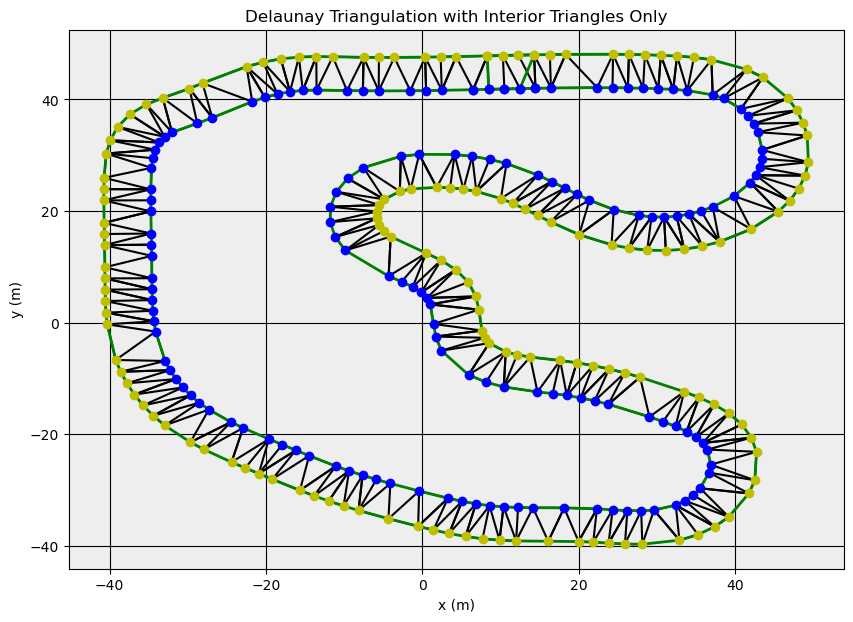

In [98]:
# Assuming Pl and C are already defined
# Perform Delaunay triangulation
tri = Delaunay(Pl)

# Validate and adjust constraints
def validate_constraints(constraints, num_points):
    valid_constraints = []
    for edge in constraints:
        if edge[0] < num_points and edge[1] < num_points:
            valid_constraints.append(edge)
        else:
            print(f"Skipping invalid edge {edge} in constraints.")
    return np.array(valid_constraints)

# Create a path from the constraints
def create_constraint_path(constraints, points):
    path_points = [points[edge[0]] for edge in constraints]
    path_points.append(path_points[0])  # Close the path
    return Path(path_points)

# Check if a triangle is inside the constrained area
def is_interior(triangle, constraint_path):
    centroid = np.mean(triangle, axis=0)
    return constraint_path.contains_point(centroid)

# Filter out triangles that are outside the constrained area
def filter_interior_triangles(tri, constraints, points):
    valid_constraints = validate_constraints(constraints, len(points))
    constraint_path = create_constraint_path(valid_constraints, points)
    interior_triangles = []
    for simplex in tri.simplices:
        triangle = points[simplex]
        if is_interior(triangle, constraint_path):
            interior_triangles.append(simplex)
    return np.array(interior_triangles)

# Filter triangles
interior_triangles = filter_interior_triangles(tri, C, Pl)

# Sort triangles by sum of vertex indices
sums = np.sum(interior_triangles, axis=1)
sorted_indices = np.argsort(sums)
TS = interior_triangles[sorted_indices]

# Plot the results
plt.figure(figsize=(10, 7))

# Plot interior triangles
for simplex in TS:
    plt.plot(Pl[simplex, 0], Pl[simplex, 1], 'k-')

# Plot the constraint edges
valid_C = validate_constraints(C, len(Pl))
for edge in valid_C:
    plt.plot(Pl[edge, 0], Pl[edge, 1], 'g-', linewidth=2)

plt.plot(inner_cone[:, 0], inner_cone[:, 1], 'bo', label='Inner Cones')  # Blue for inner cones
plt.plot(outer_cone[:, 0], outer_cone[:, 1], 'yo', label='Outer Cones')  # Yellow for outer cones
plt.grid(True)
ax = plt.gca()
ax.grid(color=[0, 0, 0])
plt.xlabel('x (m)')
plt.ylabel('y (m)')
ax.set_facecolor('#EEEEEE')
plt.title('Delaunay Triangulation with Interior Triangles Only')
plt.show()

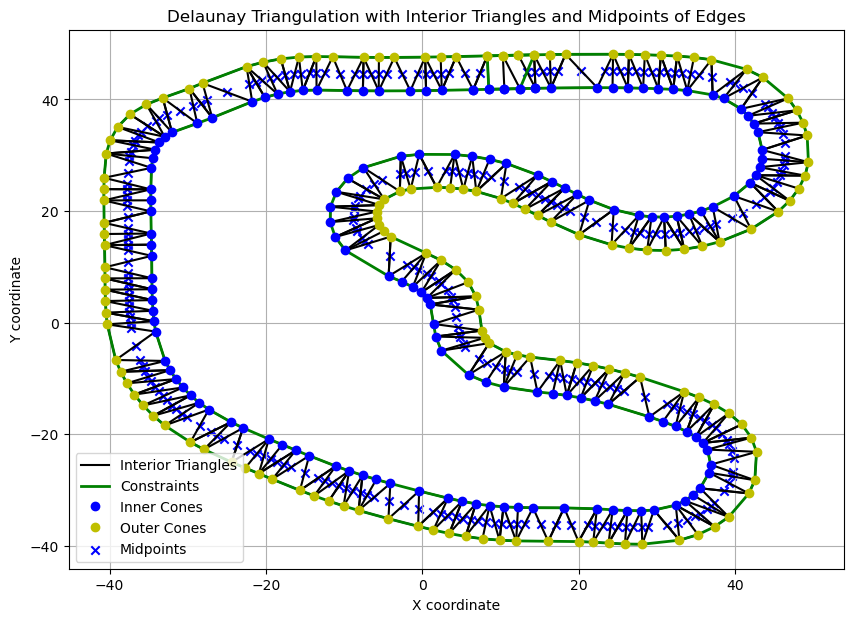

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# After interior_triangles are determined
edge_count = {}
for triangle in interior_triangles:
    for i in range(3):
        edge = tuple(sorted([triangle[i], triangle[(i+1)%3]]))
        edge_count[edge] = edge_count.get(edge, 0) + 1

# Function to check if an edge is part of the constraint
def is_constraint_edge(edge, valid_C):
    return any(np.all(edge == c) or np.all(edge == c[::-1]) for c in valid_C)

# Calculate midpoints only for true interior edges
xmp, ymp = [], []
for edge, count in edge_count.items():
    if count == 2 and not is_constraint_edge(edge, valid_C):
        midpoint = (Pl[edge[0]] + Pl[edge[1]]) / 2
        xmp.append(midpoint[0])
        ymp.append(midpoint[1])

# Plotting code
plt.figure(figsize=(10, 7))

# Plot interior triangles
for simplex in interior_triangles:
    plt.plot(Pl[simplex, 0], Pl[simplex, 1], 'k-', label='Interior Triangles' if 'Interior Triangles' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot the constraint edges
for edge in valid_C:
    plt.plot(Pl[edge, 0], Pl[edge, 1], 'g-', linewidth=2, label='Constraints' if 'Constraints' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot points
plt.plot(inner_cone[:, 0], inner_cone[:, 1], 'bo', label='Inner Cones')  # Blue for inner cones
plt.plot(outer_cone[:, 0], outer_cone[:, 1], 'yo', label='Outer Cones')  # Yellow for outer cones

# Plot midpoints
plt.scatter(xmp, ymp, color='blue', marker='x', label='Midpoints')

plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Delaunay Triangulation with Interior Triangles and Midpoints of Edges')
plt.grid(True)
plt.show()

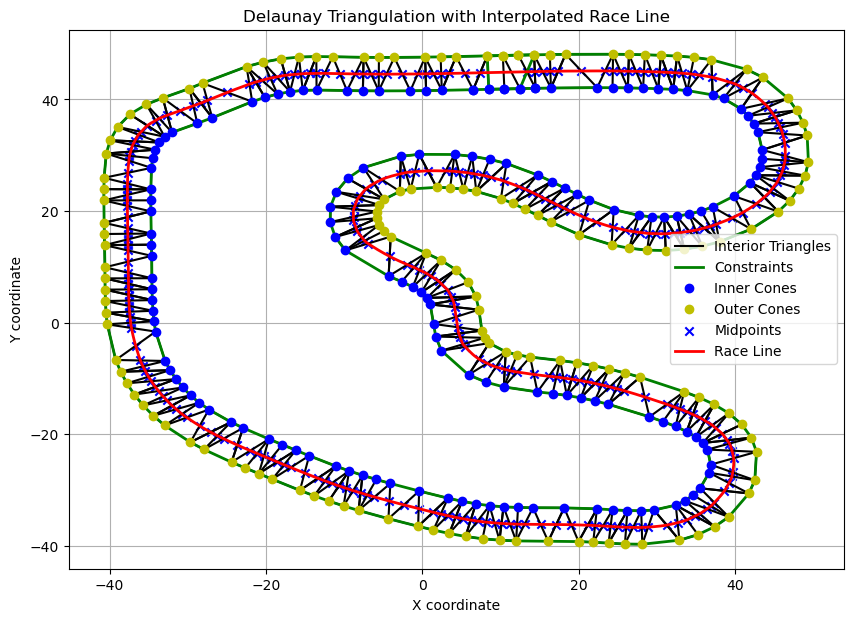

In [100]:
# Assuming xmp and ymp are your midpoint coordinates
points = np.column_stack((xmp, ymp))

# Order the points to follow the track
def order_points(points):
    # Start with the leftmost point
    ordered = [points[np.argmin(points[:, 0])]]
    points = np.delete(points, np.argmin(points[:, 0]), axis=0)
    
    while len(points) > 0:
        last = ordered[-1]
        dist = np.sum((points - last)**2, axis=1)
        closest = np.argmin(dist)
        ordered.append(points[closest])
        points = np.delete(points, closest, axis=0)
    
    return np.array(ordered)

ordered_points = order_points(points)

# Interpolate using spline
tck, u = splprep(ordered_points.T, u=None, s=0.0, per=1)
u_new = np.linspace(0, 1, 1000)
race_line = splev(u_new, tck)

# Plotting
plt.figure(figsize=(10, 7))

# Plot interior triangles
for simplex in interior_triangles:
    plt.plot(Pl[simplex, 0], Pl[simplex, 1], 'k-', label='Interior Triangles' if 'Interior Triangles' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot the constraint edges
for edge in valid_C:
    plt.plot(Pl[edge, 0], Pl[edge, 1], 'g-', linewidth=2, label='Constraints' if 'Constraints' not in plt.gca().get_legend_handles_labels()[1] else "")

# Plot points
plt.plot(inner_cone[:, 0], inner_cone[:, 1], 'bo', label='Inner Cones')  # Blue for inner cones
plt.plot(outer_cone[:, 0], outer_cone[:, 1], 'yo', label='Outer Cones')  # Yellow for outer cones

# Plot midpoints
plt.scatter(xmp, ymp, color='blue', marker='x', label='Midpoints')

# Plot interpolated race line
plt.plot(race_line[0], race_line[1], 'r-', linewidth=2, label='Race Line')

plt.legend()
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Delaunay Triangulation with Interpolated Race Line')
plt.grid(True)
plt.show()